# Specialist Certificate in Data Analytics Essentials Assignment

## Chapter 5: Clustering & Insights

## Imports

In [1]:
%cd ..

/home/michael/Documents/python_projects/UCDPA_Michael_Sandilands


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from umap import UMAP
from plotnine import (ggplot, aes, geom_boxplot, geom_col, geom_label,
                      facet_wrap, scale_fill_manual, scale_color_manual,
                      coord_flip, labs, theme)
from my_python_extensions.my_visualizations import kmeans_inertia_plot, customer_column_count_visualization
from my_python_extensions.msand import theme_msand

my_palette = ['#F1C761', '#DD8925', '#D80000', '#BC5090', '#8F00FF']

## Import Data

In [3]:
genre_clustering_data = pd.read_csv('./00_Data/genre_clustering_data.csv')

genre_features = pd.read_pickle('./00_Data/processed_genre.py')

artist_clustering_data = pd.read_csv('./00_Data/artist_clustering_data.csv')

artist_features = pd.read_pickle('./00_Data/processed_artist.py')

milliseconds_clustering_data = pd.read_csv('./00_Data/milliseconds_clustering_data.csv')

milliseconds_features = pd.read_pickle('./00_Data/processed_milliseconds.py')

invoice_lines_df = pd.read_csv('./00_Data/invoice_lines.csv')

## K-Means Algorithm

K-Means groups the data into a user specified number of clusters (k) by minimizing the distances between points and their cluster's centroid. Where the centroid of a cluster is the mean of all the points in the cluster. See [this link](https://developers.google.com/machine-learning/clustering/algorithm/run-algorithm) for reference.

### Optimal Number of Clusters

The optimal number of clusters can be found by fitting a range of clusters to the data and then computing the Inertia values, otherwise known as the within cluster sum of squares. These Inertia values can then be plotted against the number of clusters where the **Elbow-Method** may reveal the optimal number of clusters. The idea here is that, while the inertia values past this elbow still decreases, the additional information captured by each additional cluster also decreases. The trade off between adding complexity, i.e. adding additional clusters, and adding additional information is optimized at this elbow.

### Why No Train/Test Split? Why No Cross-Validation?

For unsupervised learning there is no response or target variable. Therefore, there are no 'True' values to compare our clusters with. 

#### Genre Name Inertia Plot

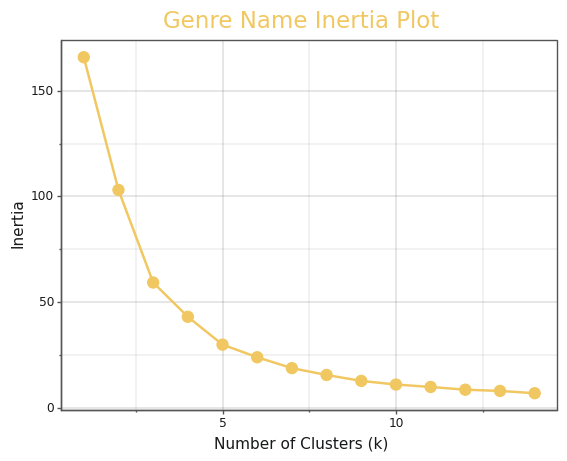

<ggplot: (8751827842253)>

In [4]:
kmeans_inertia_plot(genre_features, 15, 'Genre Name Inertia Plot')

The additional information gained past cluster 5 begins to flatten. Five clusters seem to be the optimum for 'GenreName'.

#### Artist Name Inertia Plot

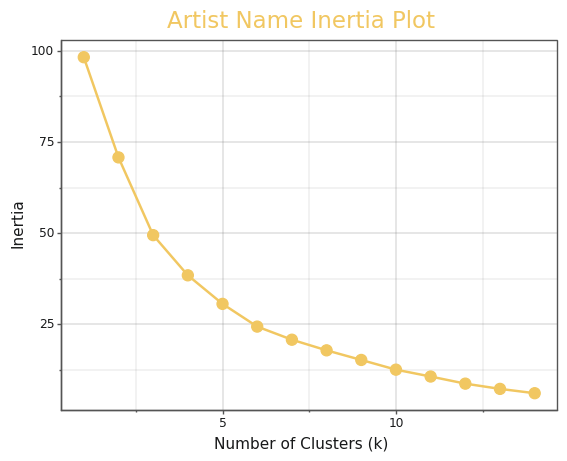

<ggplot: (8751845962625)>

In [5]:
kmeans_inertia_plot(artist_features, 15, 'Artist Name Inertia Plot')

The additional information gained past cluster 5 begins to flatten. Four clusters seem to be the optimum for 'ArtistName'.

#### Milliseconds Inertia Plot

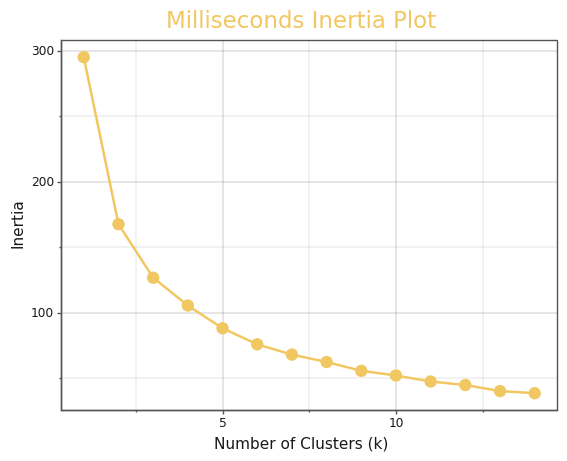

<ggplot: (8751825455325)>

In [6]:
kmeans_inertia_plot(milliseconds_features, 15, 'Milliseconds Inertia Plot')

The additional information gained past cluster 3 begins to flatten. Three clusters seem to be the optimum for 'Milliseconds'.

## Fitting the Optimal Clusters and Visualizing on the UMAP Projections

### Genre Name

/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./00_Images/customer_genre_umap.png


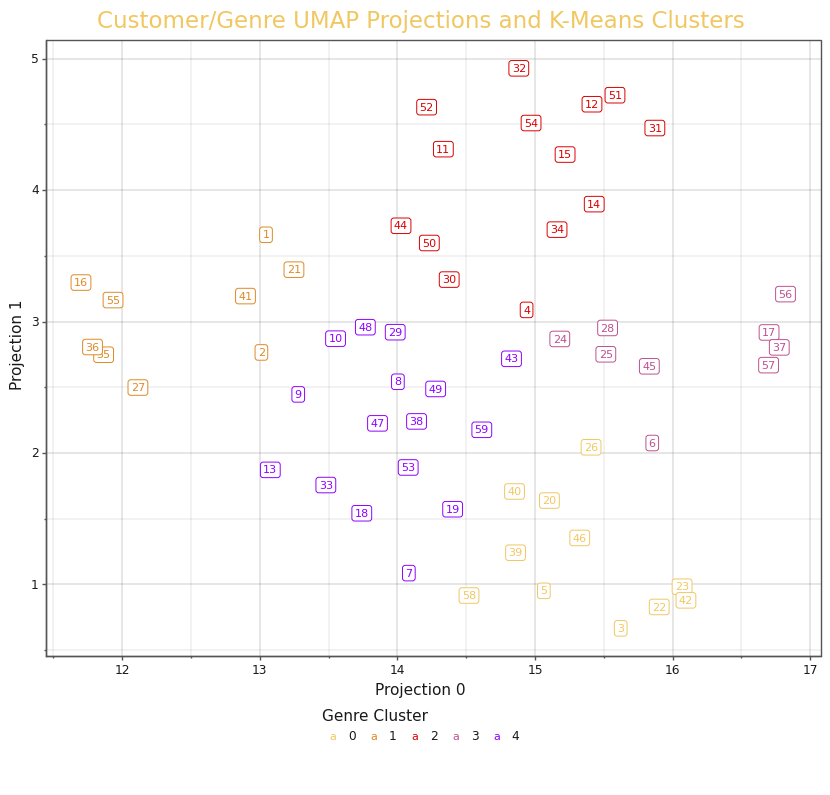

<ggplot: (8751825401337)>

In [7]:
model = KMeans(n_clusters=5, random_state=42)

model.fit(genre_features)

labels = model.predict(genre_features)

genre_clustering_data['GenreClusters'] = labels.astype(str)
genre_clustering_data['Projection_0'] = genre_features[:, 0]
genre_clustering_data['Projection_1'] = genre_features[:, 1]

g = ggplot(aes('Projection_0', 'Projection_1', color = 'GenreClusters'), data=genre_clustering_data) + \
    geom_label(aes(label = 'CustomerId'), size = 8) + \
    theme_msand() + \
    scale_color_manual(
        {
            '0': my_palette[0],
            '1': my_palette[1],
            '2': my_palette[2],
            '3': my_palette[3],
            '4': my_palette[4]   
        }
    ) + \
    labs(
        title = 'Customer/Genre UMAP Projections and K-Means Clusters',
        x = 'Projection 0', y = 'Projection 1', color = 'Genre Cluster'
    ) + \
    theme(figure_size=(10, 8))
    
g.save(filename='customer_genre_umap.png', format='png', path='./00_Images')

g

Besides showing us how the k-means algorithm segmented our data, this umap projection graph really lets us see which customers are most similar to each other. Take for example the 5 orange clusters on the left hand side of the plot, customer id 16, 55, 36, 35 and 27. These customers are well separated from any other points and are tightly clustered together. This suggests that these customers have very similar taste in genres.

### Artist Name

/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./00_Images/customer_artist_umap.png


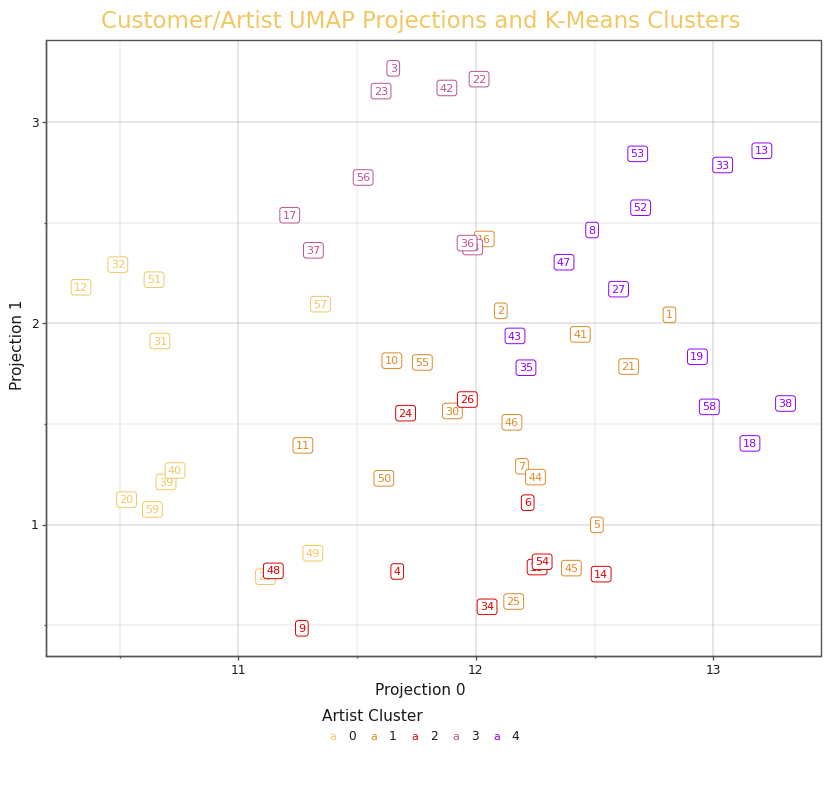

<ggplot: (8751826121453)>

In [8]:
model = KMeans(n_clusters=5, random_state=42)

model.fit(artist_features)

labels = model.predict(artist_features)

artist_clustering_data['ArtistClusters'] = labels.astype(str)
artist_clustering_data['Projection_0'] = artist_features[:, 0]
artist_clustering_data['Projection_1'] = artist_features[:, 1]
artist_clustering_data['Projection_2'] = artist_features[:, 2]

g = ggplot(aes('Projection_0', 'Projection_1', color = 'ArtistClusters'), data=artist_clustering_data) + \
    geom_label(aes(label = 'CustomerId'), size = 8) + \
    theme_msand() + \
    theme(figure_size=(10, 8)) + \
    scale_color_manual(
        {
            '0': my_palette[0],
            '1': my_palette[1],
            '2': my_palette[2],
            '3': my_palette[3],
            '4': my_palette[4]   
        }
    ) + \
    labs(
        title = 'Customer/Artist UMAP Projections and K-Means Clusters',
        x = 'Projection 0', y = 'Projection 1', color = 'Artist Cluster'
    )
    
g.save(filename='customer_artist_umap.png', format='png', path='./00_Images')

g

The UMAP projections and K-Means clusters for the artist name variable. Unfortunately we have some overlap between clusters. This is likely due to there being more dimensions than we are able to display.

### Milliseconds

/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./00_Images/customer_milliseconds_umap.png


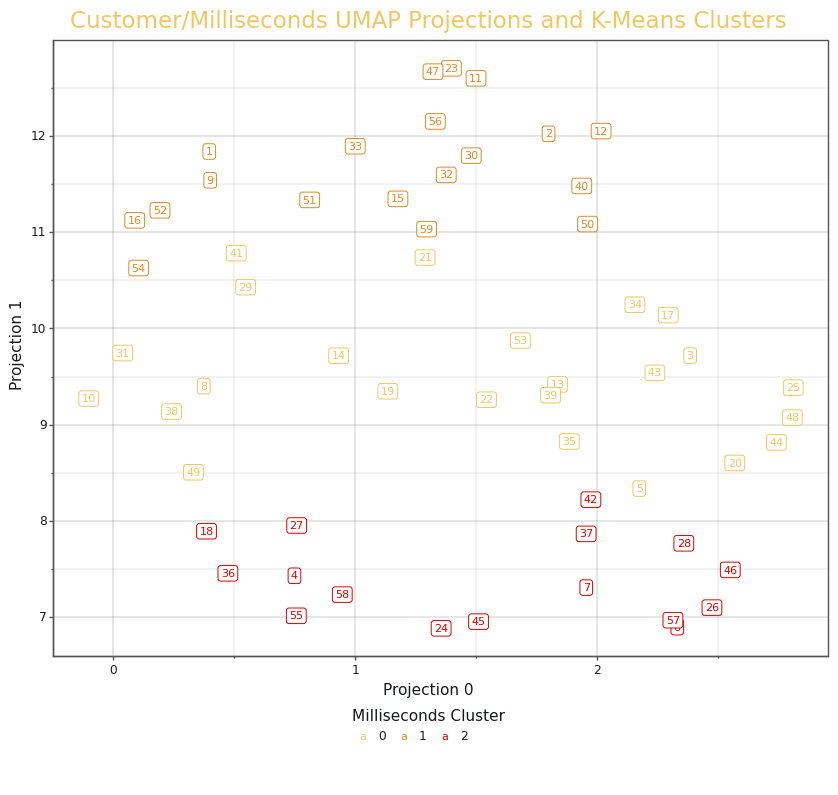

<ggplot: (8751755161177)>

In [9]:
model = KMeans(n_clusters=3, random_state=42)

model.fit(milliseconds_features)

labels = model.predict(milliseconds_features)

milliseconds_features_umap = UMAP(n_components=2, random_state=42).fit_transform(milliseconds_features)

milliseconds_clustering_data['MillisecondsClusters'] = labels.astype(str)
milliseconds_clustering_data['Projection_0'] = milliseconds_features_umap[:, 0]
milliseconds_clustering_data['Projection_1'] = milliseconds_features_umap[:, 1]

g = ggplot(aes('Projection_0', 'Projection_1', color = 'MillisecondsClusters'), data=milliseconds_clustering_data) + \
    geom_label(aes(label = 'CustomerId'), size = 8) + \
    theme_msand() + \
    theme(figure_size=(10, 8)) + \
    scale_color_manual(
        {
            '0': my_palette[0],
            '1': my_palette[1],
            '2': my_palette[2],
            '3': my_palette[3],
            '4': my_palette[4]   
        }
    ) + \
    labs(
        title = 'Customer/Milliseconds UMAP Projections and K-Means Clusters',
        x = 'Projection 0', y = 'Projection 1', color = 'Milliseconds Cluster'
    )
    
g.save(filename='customer_milliseconds_umap.png', format='png', path='./00_Images')
    
g


The UMAP projections and K-Means clusters for the Milliseconds variable.

## Analysing Clusters

### Genre Name

In [10]:
genre_clusters_df = invoice_lines_df[['CustomerId', 'GenreName']] \
    .merge(
        right = genre_clustering_data[['CustomerId', 'GenreClusters']],
        how = 'left',
        left_on= 'CustomerId',
        right_on= 'CustomerId'
    )

/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./00_Images/genre_insights.png


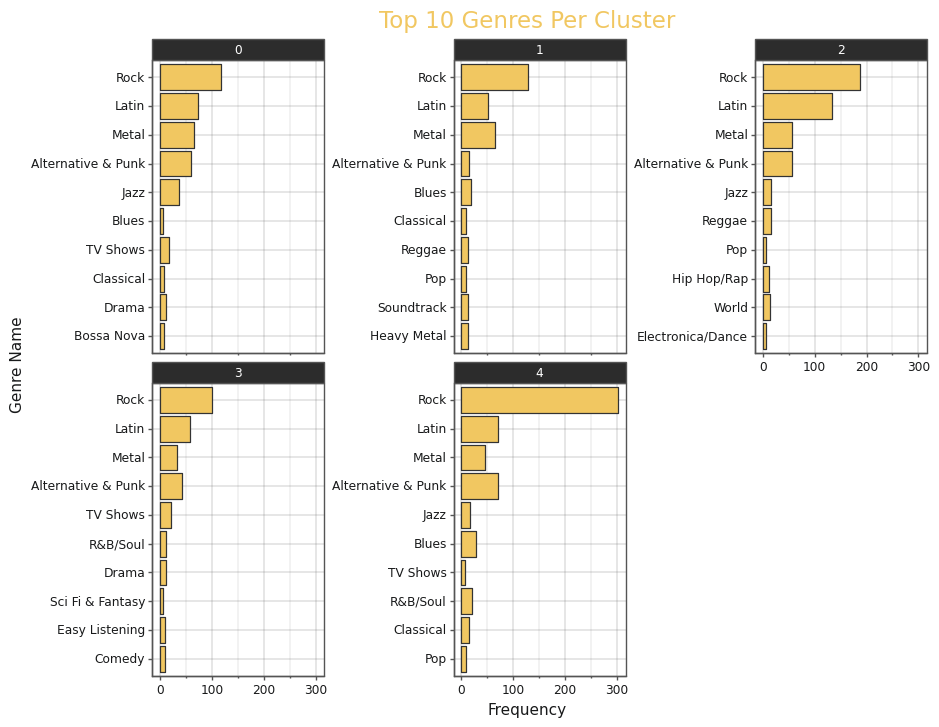

<ggplot: (8751797039073)>

In [11]:
my_order = genre_clusters_df \
    .value_counts('GenreName', ascending=True) \
    .index \
    .to_list()

genre_freq_by_cluster = genre_clusters_df \
    .groupby(['GenreClusters', 'GenreName'], group_keys=False) \
    .count() \
    .CustomerId \
    .groupby('GenreClusters', group_keys=False) \
    .nlargest(10) \
    .to_frame() \
    .reset_index() \
    .rename(columns = dict(CustomerId = 'Count')) \
    .assign(GenreName = lambda x: pd.Categorical(x['GenreName'], categories=my_order))

g = ggplot(aes('GenreName', 'Count'), data=genre_freq_by_cluster) + \
    geom_col(fill = '#F1C761', color = '#333333') + \
    coord_flip() + \
    facet_wrap('GenreClusters', scales = 'free_y') + \
    theme_msand() + \
    theme(subplots_adjust={'wspace': 0.75, 'hspace': 0.1},
          figure_size=(10, 8)) + \
    labs(
        title = 'Top 10 Genres Per Cluster',
        x = 'Genre Name',
        y = 'Frequency'
    )
    
g.save(filename='genre_insights.png', format='png', path='./00_Images')

g

This plot shows the top 10 genres for each cluster. This plot will help us to know which genres to market to each customer. 

For example: 
- All Clusters like "Rock", "Latin", "Metal" and "Alternative & Punk". "Rock" is the most frequent in every cluster.
- Cluster 0: Likes "Rock" most of all, followed by "Latin", then "Metal" then "Alternative & Punk" then "Jazz".
- Cluster 1: Is the only cluster that breaks the top 4 trend of "Rock", "Latin", "Metal" and "Alternative & Punk", having a preference for "Blues" over "Alternative & Punk". "Metal" also out performs "Latin".
- Cluster 2: Has the highest frequency for the "Latin" genre out of all the customers. "Metal" and "Alternative & Puck" are neck and neck.
- Cluster 3: "Rock" performs the best followed by "Latin". "Alternative & Punk" outperforms "Metal". 
- Cluster 4: Has a very skewed distribution. Clearly having a preference for "Rock". "Alternative & Puck" is neck and neck with "Latin" and both outperform "Metal"

The genres "Rock", "Latin", "Metal" and "Alternative & Punk" are the top 4 for every cluster, except for cluster 1. Where "Alternative & Punk" is less popular but still in the top 10. Let's explore why that's the case.

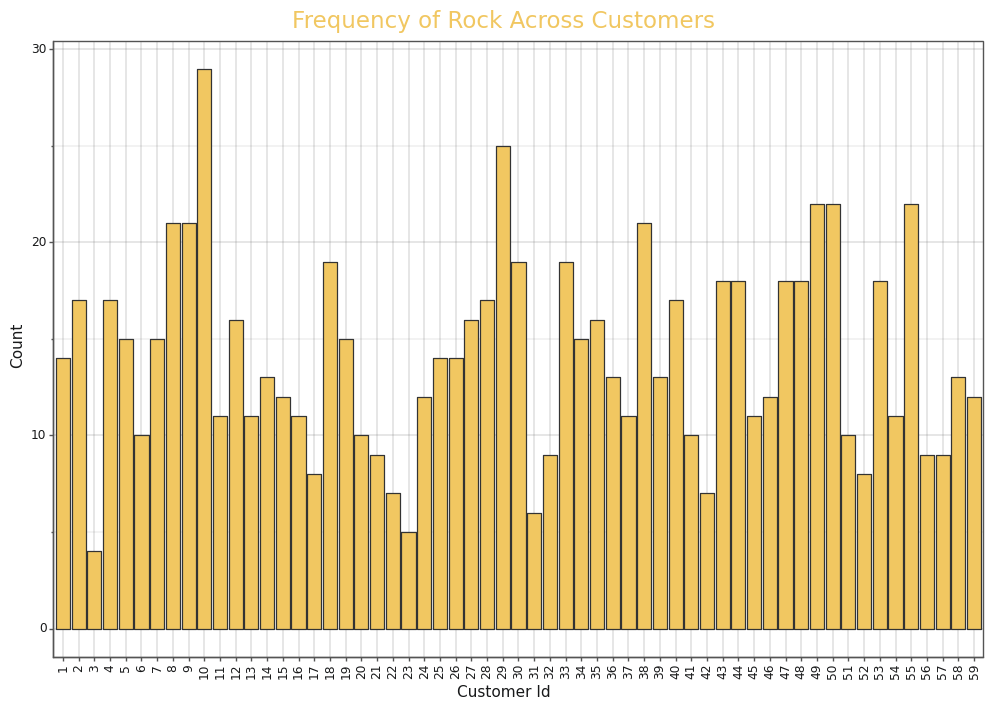

<ggplot: (8751825432021)>

In [12]:
customer_column_count_visualization(genre_clusters_df, 'GenreName', 'Rock')

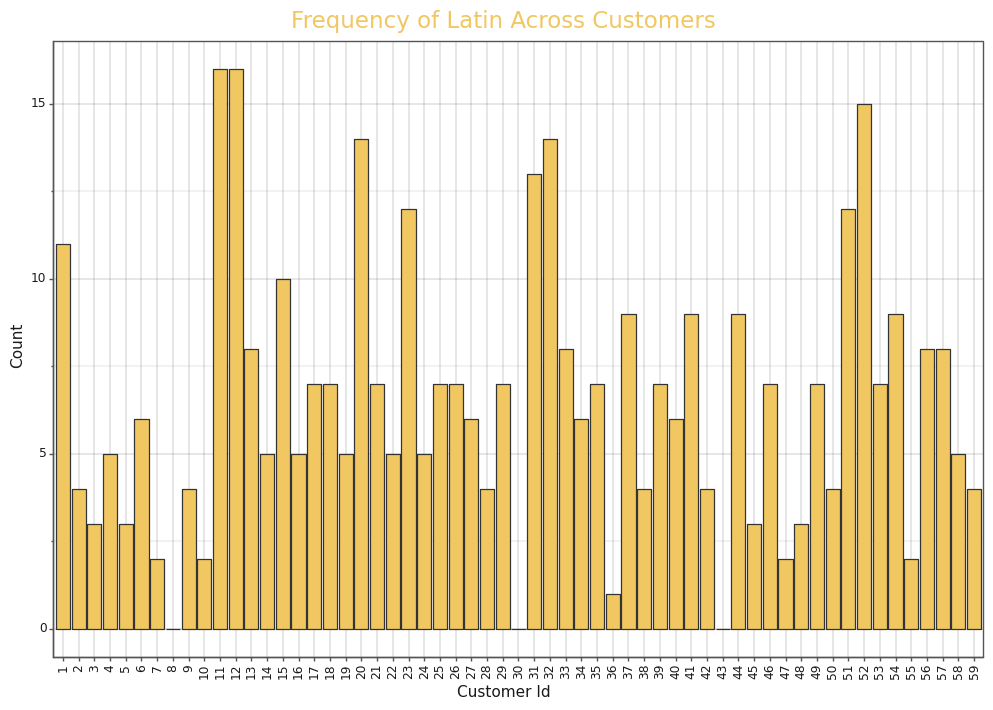

<ggplot: (8751825481389)>

In [13]:
customer_column_count_visualization(genre_clusters_df, 'GenreName', 'Latin')

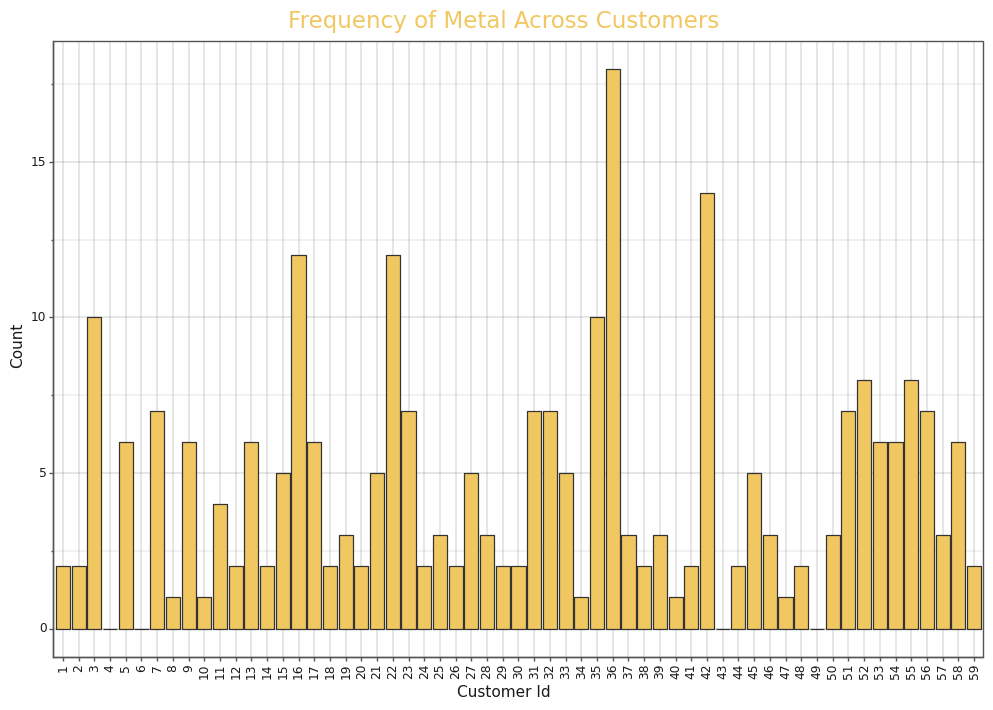

<ggplot: (8751741093453)>

In [14]:
customer_column_count_visualization(genre_clusters_df, 'GenreName', 'Metal')

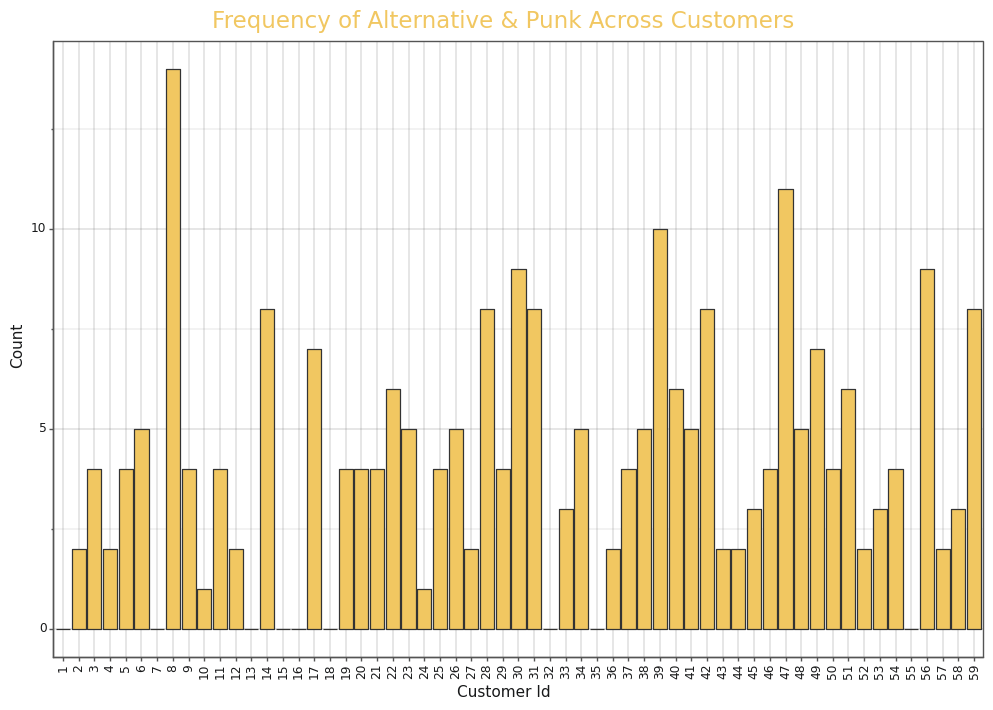

<ggplot: (8751825465845)>

In [15]:
customer_column_count_visualization(genre_clusters_df, 'GenreName', 'Alternative & Punk')

These plots make it easy to understand why "Rock", "Latin", "Metal" and "Alternative & Punk" show up in every cluster. These Genres are ubiquitous or near ubiquitous across customers.

### Artist Name

In [16]:
artist_clusters_df = invoice_lines_df[['CustomerId', 'ArtistName']] \
    .merge(
        right = artist_clustering_data[['CustomerId', 'ArtistClusters']],
        how = 'left',
        left_on= 'CustomerId',
        right_on= 'CustomerId'
    )

/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 14 x 10 in image.
/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./00_Images/artist_insights.png


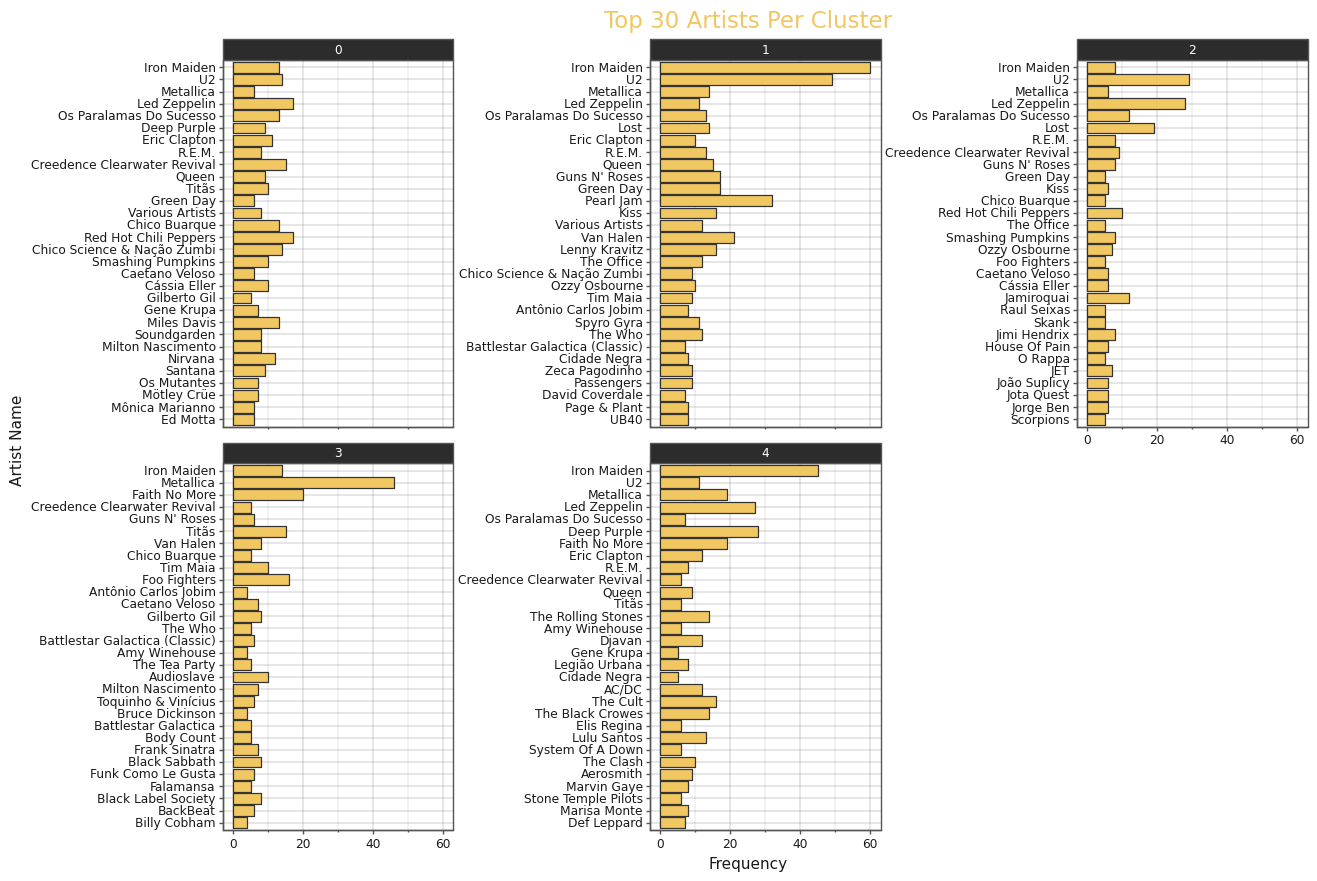

<ggplot: (8751825482377)>

In [17]:
my_order = artist_clusters_df \
    .value_counts('ArtistName', ascending=True) \
    .index \
    .to_list()

artist_freq_by_cluster = artist_clusters_df \
    .groupby(['ArtistClusters', 'ArtistName'], group_keys=False) \
    .count() \
    .CustomerId \
    .groupby('ArtistClusters', group_keys=False) \
    .nlargest(30) \
    .to_frame() \
    .reset_index() \
    .rename(columns = dict(CustomerId = 'Count')) \
    .assign(ArtistName = lambda x: pd.Categorical(x['ArtistName'], categories=my_order))

g = ggplot(aes('ArtistName', 'Count'), data=artist_freq_by_cluster) + \
    geom_col(fill = '#F1C761', color = '#333333') + \
    coord_flip() + \
    facet_wrap('ArtistClusters', scales = 'free_y') + \
    theme_msand() + \
    theme(subplots_adjust={'wspace': 0.85, 'hspace': 0.1},
          figure_size=(14, 10)) + \
    labs(
        title = 'Top 30 Artists Per Cluster',
        x = 'Artist Name',
        y = 'Frequency'
    )
    
g.save(filename='artist_insights.png', format='png', path='./00_Images')

g

Here we have the top 30 Artists for each cluster. 

- Cluster 0 has no major stand out artists. Top Artists include: "Red Hot Chili Peppers", "Led Zeppelin", "Creedence Clearwater Revival", and "U2".
- Cluster 1 has some major stand out artists, "Iron Maiden", "U2" and "Pearl Jam" are clear favorites for this cluster.
- Cluster 2 has some mild stand out artists, "U2", "Led Zeppelin" and "Lost" are some favorites among this cluster.
- Cluster 3 has "Metallica" as it's stand out favorite. Other top artists include: "Faith No More", "Foo Fighters", "Titas" and "Iron Maiden".
- Cluster 4 has a major stand out favorite in "Iron Maiden". Other top artists include: "Deep Purple", "Led Zeppelin", "Faith No More" and "Metallica".

### Milliseconds

/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
/home/michael/anaconda3/envs/venv1/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./00_Images/milliseconds_insights.png


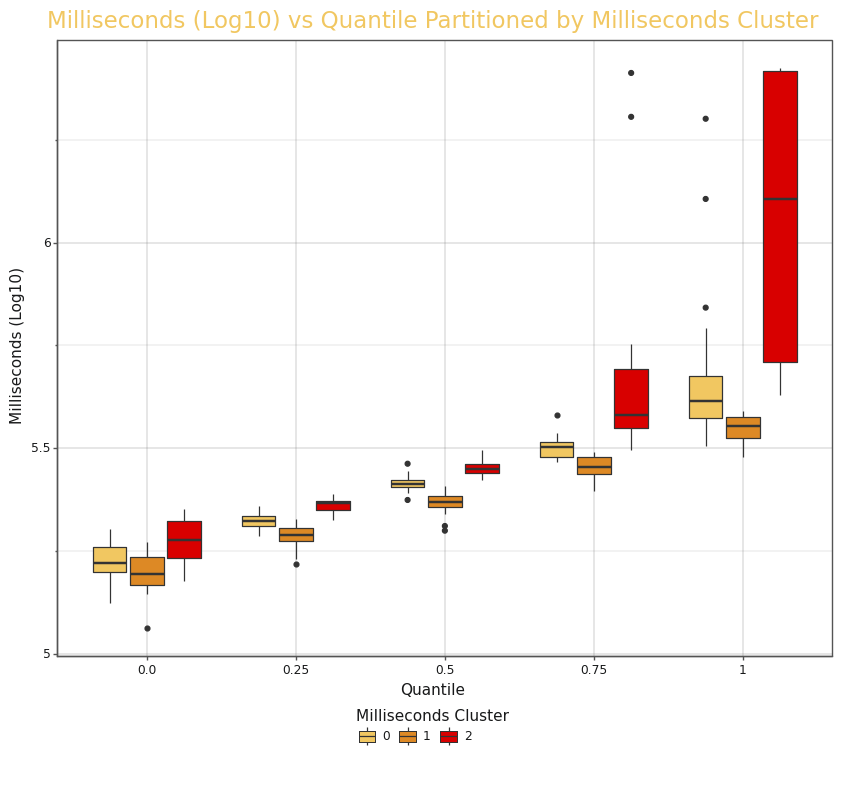

<ggplot: (8751739440457)>

In [18]:
cols_list = milliseconds_clustering_data.columns.tolist()

quantile_vars = [col for col in cols_list if 'MillisecondsQuantile' in col]

milliseconds_clustered_data = milliseconds_clustering_data \
    .filter(regex="^(?!Projection)") \
    .melt(
        value_vars=quantile_vars,
        var_name='quantile',
        value_name='Milliseconds',
        id_vars=['CustomerId', 'MillisecondsClusters']
    ) \
    .assign(quantile=lambda x: x['quantile'].str.replace('MillisecondsQuantile_', '')) \
    .sort_values(['quantile', 'MillisecondsClusters'])

milliseconds_clustered_data['MillisecondsLog10'] = np.log10(
    milliseconds_clustered_data['Milliseconds'])

g = ggplot(aes('quantile', 'MillisecondsLog10', fill='MillisecondsClusters'), 
       data=milliseconds_clustered_data) + \
    geom_boxplot() + \
    theme_msand() + \
    theme(figure_size=(10, 8)) + \
    scale_fill_manual(
        {
            '0': '#F1C761',
            '1': '#DD8925',
            '2': '#D80000'
        }
    ) + \
    labs(
        title = 'Milliseconds (Log10) vs Quantile Partitioned by Milliseconds Cluster',
        x = 'Quantile',
        y = 'Milliseconds (Log10)',
        fill = 'Milliseconds Cluster'
    )

g.save(filename='milliseconds_insights.png', format='png', path='./00_Images')

g

This plot shows how our Milliseconds features have been clustered. 

- Cluster 2 prefers longer duration of songs.
- Cluster 1 prefers shorter duration of songs.
- Cluster 0 rest in between cluster 1 & cluster 2.